In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

current_dir = os.getcwd()

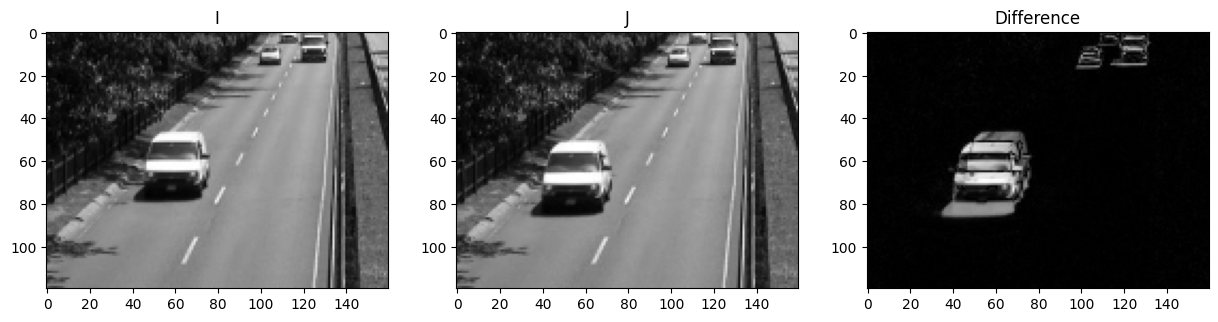

In [2]:
I = cv2.imread(f"{current_dir}/I.jpg", cv2.IMREAD_GRAYSCALE)
J = cv2.imread(f"{current_dir}/J.jpg", cv2.IMREAD_GRAYSCALE)
I_smaller = cv2.resize(I, (0,0), fx=0.5, fy=0.5)
J_smaller = cv2.resize(J, (0,0), fx=0.5, fy=0.5)
diff_smaller = cv2.absdiff(I_smaller, J_smaller).astype(np.uint8)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(I_smaller, cmap='gray')
axs[0].set_title('I')
axs[1].imshow(J_smaller, cmap='gray')
axs[1].set_title('J')
axs[2].imshow(diff_smaller, cmap='gray')
axs[2].set_title('Difference')
plt.show()


In [3]:
def metoda_blokowa(I,J,window_size: int = 7, dx_size:int = 3):
    I = I.astype(np.float32)
    J = J.astype(np.float32)
    W2 = window_size // 2
    yy, xx = I.shape
    dX ,dY = dx_size, dx_size
    u, v = np.zeros(I.shape), np.zeros(I.shape)

    for y in range(W2+dY, yy-W2 -dY):
        for x in range(W2+dX, xx-W2 -dX):
            I_block = I[y-W2:y+W2+1, x-W2:x+W2+1].astype(np.float32)
            min_diff = np.inf
            for dy in range(-dY, dY+1):
                for dx in range(-dX, dX+1):
                    J_block = J[y+dy-W2:y+dy+W2+1, x+dx-W2:x+dx+W2+1].astype(np.float32)
                    diff = np.sqrt(np.sum(np.square(J_block - I_block))).astype(np.float32)
                    if diff < min_diff:
                        min_diff = diff
                        best_dx = dx
                        best_dy = dy
            u[y,x] = best_dx
            v[y,x] = best_dy
    mag, angle = cv2.cartToPolar(u, v)
    hsv_image = np.zeros((yy, xx, 3), dtype=np.uint8)
    hsv_image[..., 0] = (angle * 90 / np.pi).astype(np.uint8)
    hsv_image[..., 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    hsv_image[..., 2] = 255
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB).astype(np.uint8)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()
    return rgb_image

            

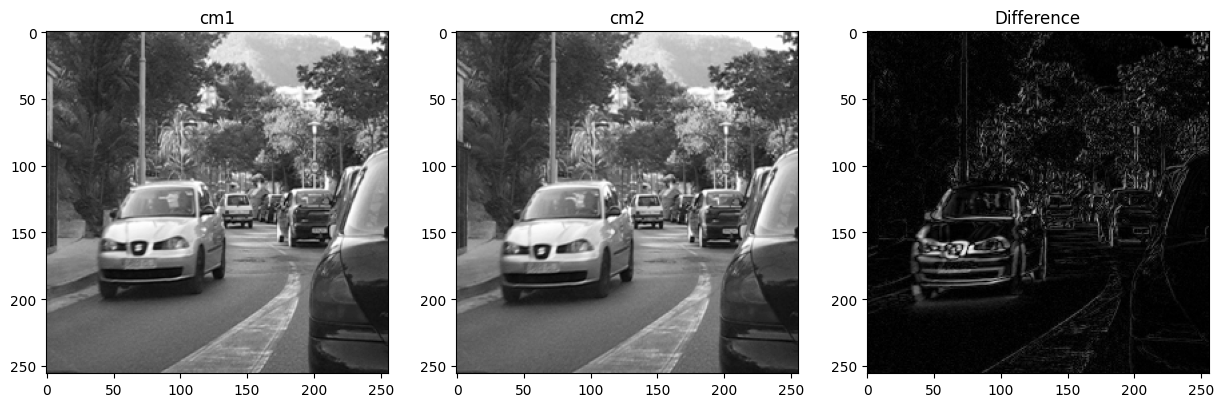

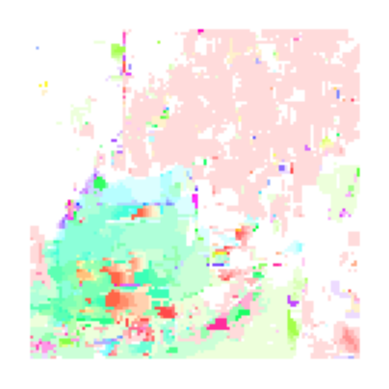

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [4]:
cm1 = cv2.imread(f"{current_dir}/cm1.png", cv2.IMREAD_GRAYSCALE)
cm2 = cv2.imread(f"{current_dir}/cm2.png", cv2.IMREAD_GRAYSCALE)
cm1_smaller = cv2.resize(cm1, (0,0), fx=0.5, fy=0.5)
cm2_smaller = cv2.resize(cm2, (0,0), fx=0.5, fy=0.5)
diff = cv2.absdiff(cm1, cm2).astype(np.uint8)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cm1, cmap='gray')
axs[0].set_title('cm1')
axs[1].imshow(cm2, cmap='gray')
axs[1].set_title('cm2')
axs[2].imshow(diff, cmap='gray')
axs[2].set_title('Difference')
plt.show()

metoda_blokowa(cm1_smaller, cm2_smaller, window_size=5, dx_size=5)

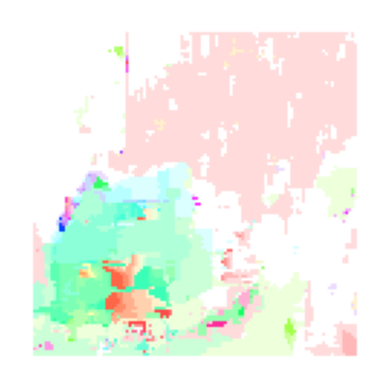

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
cm1_small = cv2.resize(cm1, (0,0), fx=0.5, fy=0.5)
cm2_small = cv2.resize(cm2, (0,0), fx=0.5, fy=0.5)
metoda_blokowa(cm1_small, cm2_small, window_size=7, dx_size=5)

In [18]:
def of(II, JJ, window_size=3, dx_size=3):
    I = II.astype(np.float32)
    J = JJ.astype(np.float32)
    W2 = window_size // 2
    yy, xx = I.shape
    dX ,dY = dx_size, dx_size
    u, v = np.zeros(I.shape, dtype=np.float64), np.zeros(I.shape, dtype=np.float64)

    for y in range(W2+dY, yy-W2 -dY):
        for x in range(W2+dX, xx-W2 -dX):
            I_block = I[y-W2:y+W2+1, x-W2:x+W2+1].astype(np.float64)
            min_diff = np.inf
            for dy in range(-dY, dY+1):
                for dx in range(-dX, dX+1):
                    J_block = J[y+dy-W2:y+dy+W2+1, x+dx-W2:x+dx+W2+1].astype(np.float64)
                    diff = np.sqrt(np.sum(np.square(J_block - I_block))).astype(np.float64)
                    if diff < min_diff:
                        min_diff = diff
                        best_dx = dx
                        best_dy = dy
            u[y,x] = best_dx
            v[y,x] = best_dy
    return u, v

def vis_flow(u, v, Y,X, name):
    mag, angle = cv2.cartToPolar(u, v)
    hsv_image = np.zeros((Y, X, 3), dtype=np.uint8)
    hsv_image[..., 0] = (angle * 90 / np.pi).astype(np.uint8)
    hsv_image[..., 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    hsv_image[..., 2] = 255
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB).astype(np.uint8)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.title(name)
    plt.show()

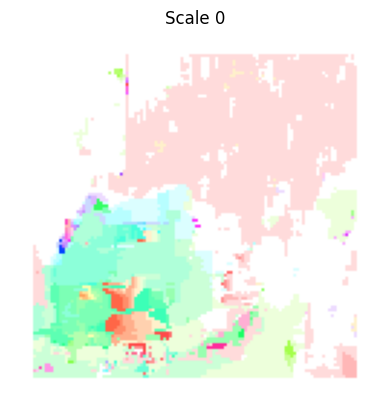

In [7]:
def wieloskalowa_metoda_blokowa(I, J, window_size: int = 7, dx_size: int = 3, scales: int = 3) -> None:
    for scale in range(scales):
        I = cv2.resize(I, (0,0), fx=0.5, fy=0.5)
        J = cv2.resize(J, (0,0), fx=0.5, fy=0.5)
        u, v = of(I, J, window_size, dx_size)
        vis_flow(u, v, I.shape[0], I.shape[1], f"Scale {scale}")
    
wieloskalowa_metoda_blokowa(cm1, cm2, window_size=7, dx_size=5, scales=1)

In [12]:
def pyramid (im , max_scale ):
    images =[ im ]
    for k in range (1 ,max_scale ):
        images.append(cv2.resize (images [k -1], (0 ,0), fx =0.5, fy =0.5))
    return images

cm1 = cv2.imread(f"{current_dir}/cm1.png", cv2.IMREAD_GRAYSCALE)
cm2 = cv2.imread(f"{current_dir}/cm2.png", cv2.IMREAD_GRAYSCALE)
I = cv2.imread(f"{current_dir}/I.jpg", cv2.IMREAD_GRAYSCALE)
J = cv2.imread(f"{current_dir}/J.jpg", cv2.IMREAD_GRAYSCALE)

IP = pyramid(I, 3)
JP = pyramid(J, 3)
print(len(IP))

3


(120, 160)


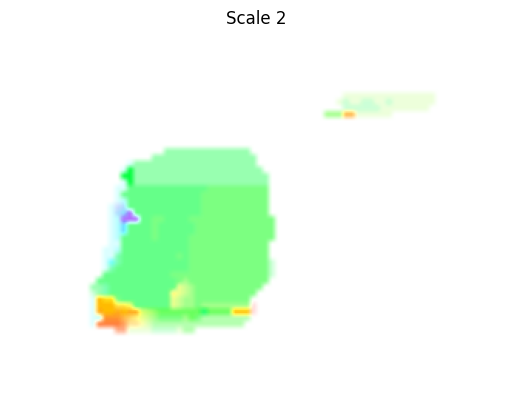

(240, 320)


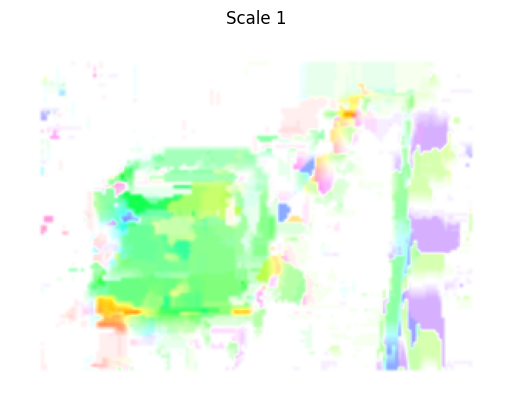

(480, 640)


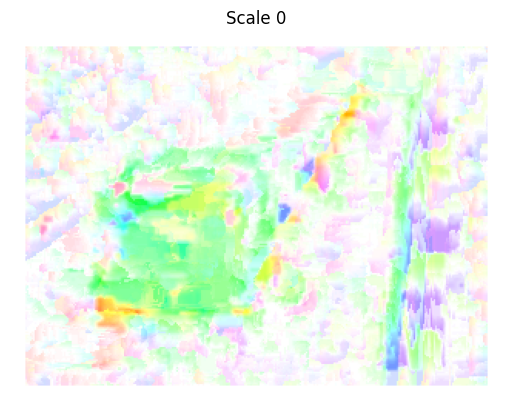

In [20]:
total_flow_u = np.zeros_like(IP[0], dtype=np.float64)
total_flow_v = np.zeros_like(IP[0], dtype=np.float64)

smallest_I = IP[-1].astype(np.uint8)

for i in range(len(IP) - 1, -1, -1):
    
    u, v = of(smallest_I, JP[i], window_size=11, dx_size=5)
    
    total_flow_u += (cv2.resize(u  * 2**i  , (0,0), fx=2**i, fy=2**i, interpolation=cv2.INTER_LINEAR))
    total_flow_v += (cv2.resize(v  * 2**i , (0,0), fx=2**i, fy=2**i, interpolation=cv2.INTER_LINEAR) )

    I_copy = smallest_I.copy()
    for yy in range(smallest_I.shape[0]):
        for xx in range(smallest_I.shape[1]):
            index_x = (xx+u[yy,xx]).astype(np.int32)
            index_y = (yy+v[yy,xx]).astype(np.int32)
            smallest_I[index_y, index_x] = I_copy[yy,xx]
    smallest_copy = smallest_I.copy()
    smallest_I = cv2.resize(smallest_copy, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    print(smallest_I.shape)

    vis_flow(total_flow_u, total_flow_v, total_flow_u.shape[0],total_flow_u.shape[1], f"Scale {i}")
    